# Statistic and Machine Learning Project

## Dataset: Financial Bank Marketing

Dataset:  https://archive.ics.uci.edu/ml/datasets/bank+marketing

### Problem statement:

To determine what strategies can be offered to the financial institutes in order to improve future marketing campaigns using machine learning models.

### Data Description
This document utilizes Data Classification to examine a dataset related to direct marketing campaigns of a Portuguese banking institution. The marketing campaigns were based on a phone call. Often contacting the same client more than once was required in order to see whether the client will subscribe for a term deposit or not. The objective of the classification is to predict if the client will subscribe to a Term Deposit. Often, more than one contact to the same client was required, in order to access if the product (bank term deposit) would be ('yes') or not ('no') subscribed. The important objective is to analyze what strategies can be offered to the banking institution in order to improve future marketing campaigns

### Desired Target
To determine whether the client will subsrcirbe for the Term Deposit? (Yes or No)

### Parameters
- age (numeric)
- job : type of job (categorical: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown')
- marital : marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)
- education (categorical: 'basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown')
- default: has credit in default? (categorical: 'no','yes','unknown')
- housing: has housing loan? (categorical: 'no','yes','unknown')
- loan: has personal loan? (categorical: 'no','yes','unknown')
- contact: contact communication type (categorical: 'cellular','telephone') 
- month: last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')
- day_of_week: last contact day of the week (categorical: 'mon','tue','wed','thu','fri')
- duration: last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.
- campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)
- pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)
- previous: number of contacts performed before this campaign and for this client (numeric)
- poutcome: outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success')

### Term Deposit

A Term deposit is offered by a bank or a financial institution on a fixed rate (unlike just opening deposit account) in which client's money will be returned back at a specific maturity time.

### Questions:
(1) What are the factors affecting the deals?


(2) What is the end result? Is the overall result fruitful?

## Importing Libraries

In [1]:
%matplotlib inline

import os
import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
from statsmodels.formula.api import ols
import scipy.stats as st
import statsmodels.api as sm
from scipy.stats.stats import pearsonr
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

## Reading the dataset

In [2]:
#Reading the dataset and display the first five rows using head function.
bank = pd.read_csv("C:\\Users\\sshah\\Desktop\\SML\\bank-full.csv",engine="python",index_col=False,sep=';\s*')
bank.head(5)

,"""age","""""job""""","""""marital""""","""""education""""","""""default""""","""""balance""""","""""housing""""","""""loan""""","""""contact""""","""""day""""","""""month""""","""""duration""""","""""campaign""""","""""pdays""""","""""previous""""","""""poutcome""""","""""y"""""""
0,"""58","""""management""""","""""married""""","""""tertiary""""","""""no""""",2143,"""""yes""""","""""no""""","""""unknown""""",5,"""""may""""",261,1,-1,0,"""""unknown""""","""""no"""""""
1,"""44","""""technician""""","""""single""""","""""secondary""""","""""no""""",29,"""""yes""""","""""no""""","""""unknown""""",5,"""""may""""",151,1,-1,0,"""""unknown""""","""""no"""""""
2,"""33","""""entrepreneur""""","""""married""""","""""secondary""""","""""no""""",2,"""""yes""""","""""yes""""","""""unknown""""",5,"""""may""""",76,1,-1,0,"""""unknown""""","""""no"""""""
3,"""47","""""blue-collar""""","""""married""""","""""unknown""""","""""no""""",1506,"""""yes""""","""""no""""","""""unknown""""",5,"""""may""""",92,1,-1,0,"""""unknown""""","""""no"""""""
4,"""33","""""unknown""""","""""single""""","""""unknown""""","""""no""""",1,"""""no""""","""""no""""","""""unknown""""",5,"""""may""""",198,1,-1,0,"""""unknown""""","""""no"""""""


In [3]:
bank.columns

Index(['"age', '""job""', '""marital""', '""education""', '""default""',
       '""balance""', '""housing""', '""loan""', '""contact""', '""day""',
       '""month""', '""duration""', '""campaign""', '""pdays""',
       '""previous""', '""poutcome""', '""y"""'],
      dtype='object')

## Data Cleaning

#### We can see " in each coulmn names as well as coulm values.So let us remove that.

In [4]:
bank.columns=['age','job','marital','education','default','balance','housing','loan','contact','day','month','duration','campaign','pdays','previous','poutcome','deals']
bank.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deals
0,"""58","""""management""""","""""married""""","""""tertiary""""","""""no""""",2143,"""""yes""""","""""no""""","""""unknown""""",5,"""""may""""",261,1,-1,0,"""""unknown""""","""""no"""""""
1,"""44","""""technician""""","""""single""""","""""secondary""""","""""no""""",29,"""""yes""""","""""no""""","""""unknown""""",5,"""""may""""",151,1,-1,0,"""""unknown""""","""""no"""""""
2,"""33","""""entrepreneur""""","""""married""""","""""secondary""""","""""no""""",2,"""""yes""""","""""yes""""","""""unknown""""",5,"""""may""""",76,1,-1,0,"""""unknown""""","""""no"""""""
3,"""47","""""blue-collar""""","""""married""""","""""unknown""""","""""no""""",1506,"""""yes""""","""""no""""","""""unknown""""",5,"""""may""""",92,1,-1,0,"""""unknown""""","""""no"""""""
4,"""33","""""unknown""""","""""single""""","""""unknown""""","""""no""""",1,"""""no""""","""""no""""","""""unknown""""",5,"""""may""""",198,1,-1,0,"""""unknown""""","""""no"""""""


In [5]:
bank['age']=bank.age.str.strip('"')
bank['job']=bank.job.str.strip('""')
bank['marital']=bank.marital.str.strip('""')
bank['education']=bank.education.str.strip('""')
bank['default']=bank.default.str.strip('""')
bank['housing']=bank.housing.str.strip('""')
bank['loan']=bank.loan.str.strip('""')
bank['contact']=bank.contact.str.strip('""')
bank['month']=bank.month.str.strip('""')
bank['poutcome']=bank.poutcome.str.strip('""')
bank['deals']=bank.deals.str.strip('""')
bank.head(5)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deals
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


#### To display the total number of rows and columns of the dataset.

In [6]:
 bank.shape

(45211, 17)

So our Dataset contains:

####  Total number of row: 45,211
#### Total number of Coulmns: 17

#### Determining null values in our dataset(missing values)

In [7]:
bank.isnull().any()

age          False
job          False
marital      False
education    False
default      False
balance      False
housing      False
loan         False
contact      False
day          False
month        False
duration     False
campaign     False
pdays        False
previous     False
poutcome     False
deals        False
dtype: bool

In [8]:
#nunique() method gives the number of all unique values in all the columns.
print(bank.info())
bank.nunique()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
age          45211 non-null object
job          45211 non-null object
marital      45211 non-null object
education    45211 non-null object
default      45211 non-null object
balance      45211 non-null int64
housing      45211 non-null object
loan         45211 non-null object
contact      45211 non-null object
day          45211 non-null int64
month        45211 non-null object
duration     45211 non-null int64
campaign     45211 non-null int64
pdays        45211 non-null int64
previous     45211 non-null int64
poutcome     45211 non-null object
deals        45211 non-null object
dtypes: int64(6), object(11)
memory usage: 5.9+ MB
None


age            77
job            12
marital         3
education       4
default         2
balance      7168
housing         2
loan            2
contact         3
day            31
month          12
duration     1573
campaign       48
pdays         559
previous       41
poutcome        4
deals           2
dtype: int64

#### Here, we can see that the datatype of column age is 'object'. Changing it to datatype int.

In [9]:
bank['age']=pd.to_numeric(bank['age'])
bank['age'].dtype

dtype('int64')

#### Distinguishing numerial and categorical data. 

In [10]:
num_attributes  = bank.columns.values[(bank.dtypes =='int64') | (bank.dtypes =='float64')]
print("Numerical Attributes: ", num_attributes)
categorical_attributes  = bank.columns.values[(bank.dtypes !='int64') & (bank.dtypes !='float64')]
print("Catogorical Attributes: ", categorical_attributes)

Numerical Attributes:  ['age' 'balance' 'day' 'duration' 'campaign' 'pdays' 'previous']
Catogorical Attributes:  ['job' 'marital' 'education' 'default' 'housing' 'loan' 'contact' 'month'
 'poutcome' 'deals']


# Data analysis and visualization

#### Get the number of deals that where successful out of the total calls made.

In [11]:
bank[bank.deals=='yes'].count()[1]

5289

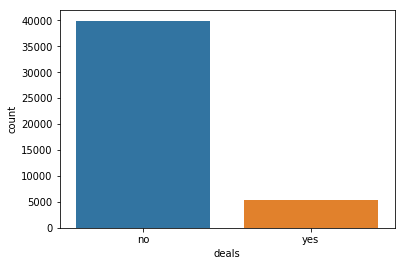

In [12]:
sns.countplot(x='deals',data=bank)

So here we can see that out of the toatl 45,211 calls made 5,289 subscribed for term deposit.

#### To determine the success rate of the marketing(i.e success percent).

In [13]:
(5289/45211)*100

11.698480458295547

So the success rate is 11.69%

In [14]:
bank.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


From the above output , the minimum age is 18 and the maximum age is 95, with mean age being approx 41.

In [15]:
bank.groupby('deals').mean()

,age,balance,day,duration,campaign,pdays,previous
deals,,,,,,,
no,40.838986,1303.714969,15.892290,221.182806,2.846350,36.421372,0.502154
yes,41.670070,1804.267915,15.158253,537.294574,2.141047,68.702968,1.170354


### Correlation in the quantitative attributes

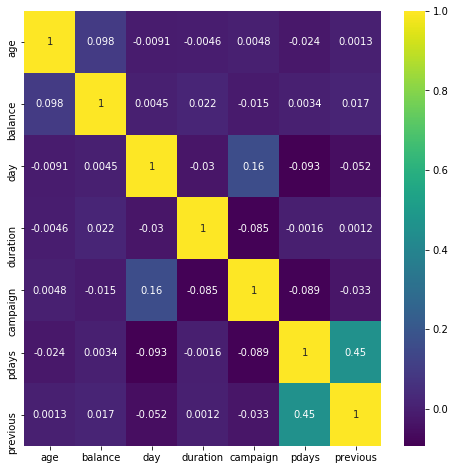

In [16]:
plt.figure(figsize=(8,8))
sns.heatmap(data=bank.corr(),annot=True, cmap='viridis')

### As we can see that numerical attributes are not significantly correlated with each other, so have no linear relationship.

# To analyze all Independent Numerical variables against Target variable (Deals)

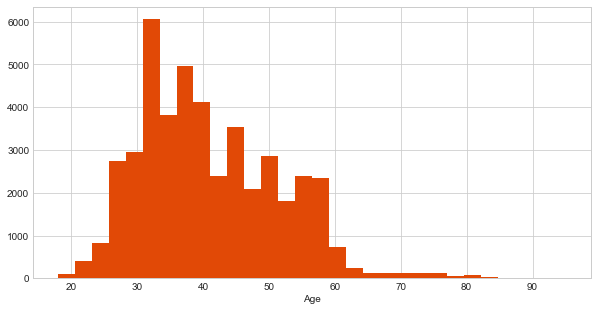

In [17]:
# Let's see how the numeric data is distributed.
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')

bank['age'].hist(bins=30,figsize=(10,5), color='#E14906')
plt.xlabel('Age')
plt.show()

Here,we can see the max Age group who subscribed for the term deposit was from age group 30-60 years.

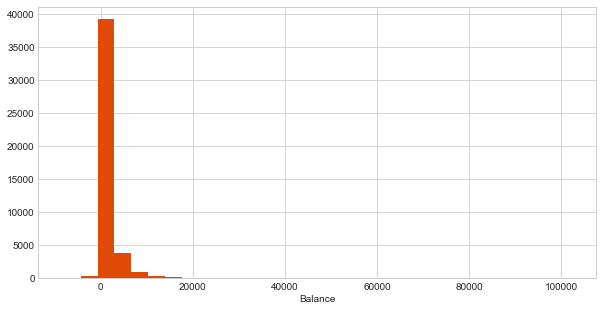

In [18]:
# Let's see how the numeric data is distributed.
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')

bank['balance'].hist(bins=30, figsize=(10,5), color='#E14906')
plt.xlabel('Balance')
plt.show()

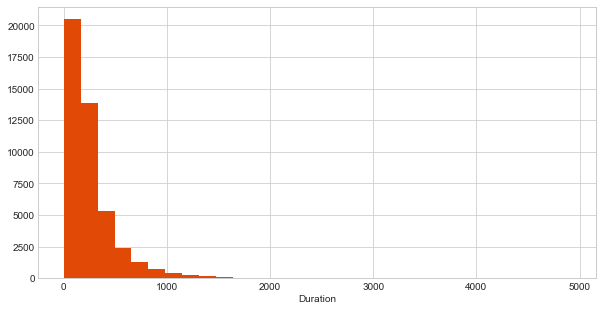

In [19]:
# Let's see how the numeric data is distributed.
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')

bank['duration'].hist(bins=30, figsize=(10,5), color='#E14906')
plt.xlabel('Duration')
plt.show()

Here we can see that people with less call duration tend to subscribe more for the term deposit.

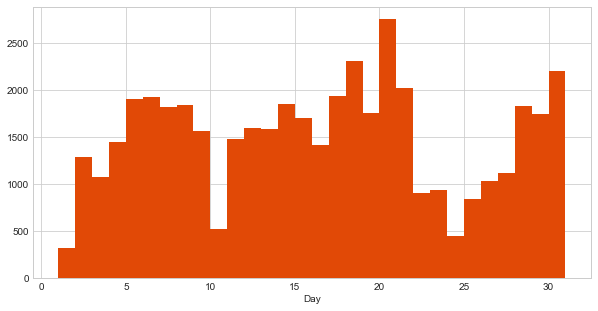

In [20]:
plt.style.use('seaborn-whitegrid')

bank['day'].hist(bins=30, figsize=(10,5), color='#E14906')
plt.xlabel('Day')
plt.show()

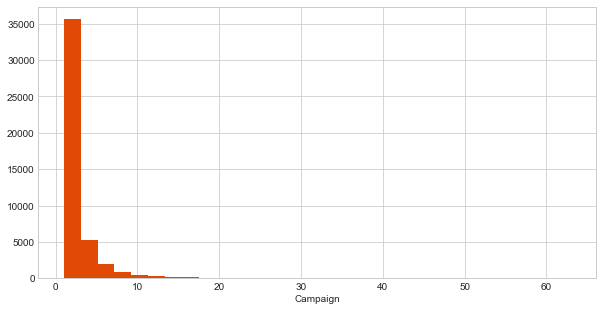

In [21]:
plt.style.use('seaborn-whitegrid')

bank['campaign'].hist(bins=30, figsize=(10,5), color='#E14906')
plt.xlabel('Campaign')
plt.show()

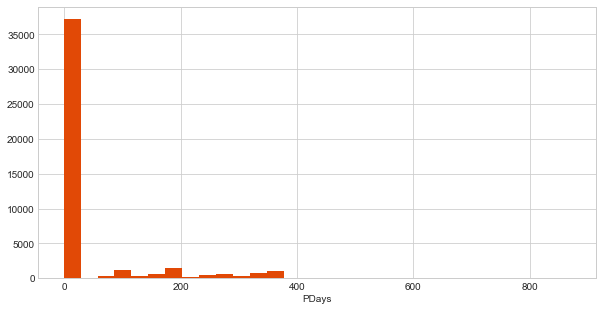

In [22]:
plt.style.use('seaborn-whitegrid')

bank['pdays'].hist(bins=30, figsize=(10,5), color='#E14906')
plt.xlabel('PDays')
plt.show()

Here, we can observe that the less the previous days for the customer the more the subcription rate.

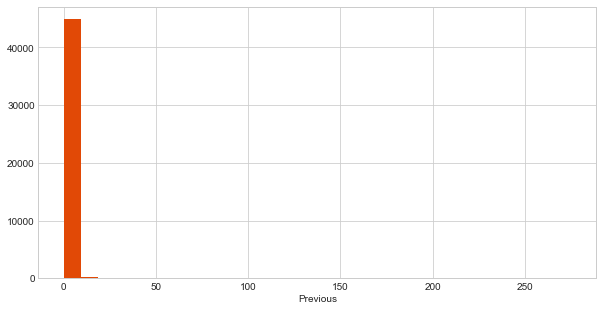

In [23]:
plt.style.use('seaborn-whitegrid')

bank['previous'].hist(bins=30, figsize=(10,5), color='#E14906')
plt.xlabel('Previous')
plt.show()

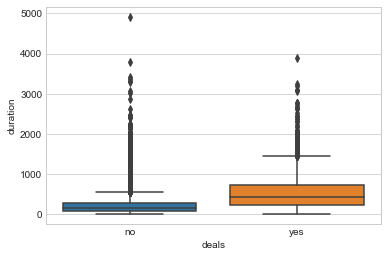

In [24]:
#For Duration
sns.boxplot(x='deals', y='duration', data=bank)

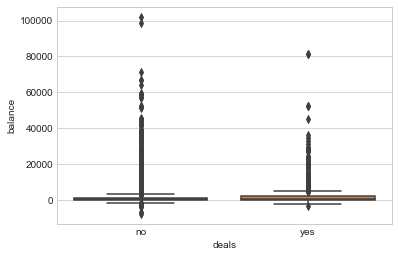

In [25]:
#For Balance
sns.boxplot(x='deals', y='balance', data=bank)

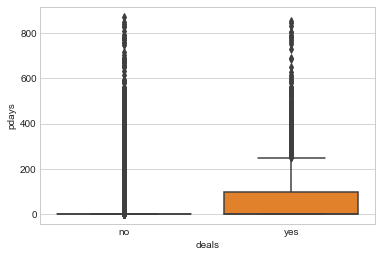

In [26]:
#For Pdays
sns.boxplot(x='deals', y='pdays', data=bank)

We can see that for successful deals pdays is high.

# Analysis on Independent Categorical Variables

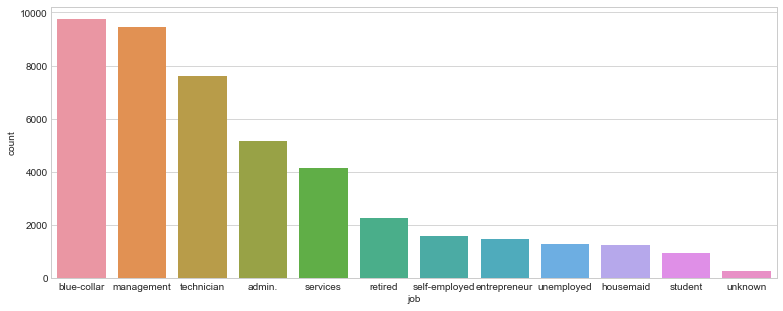

In [27]:
fig, ax = plt.subplots(figsize=(13,5))
sns.countplot('job',data=bank,order = bank['job'].value_counts().index)

Here, we can see that the Blue-collar job category people tend to subscribe more. 

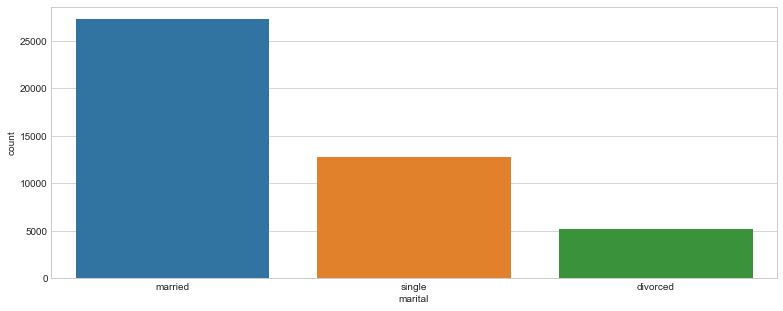

In [28]:
fig, ax = plt.subplots(figsize=(13, 5))
sns.countplot('marital',data=bank,order = bank['marital'].value_counts().index)

From the above graph, we see that the people with martial status 'married' subscribe more the term deposit.

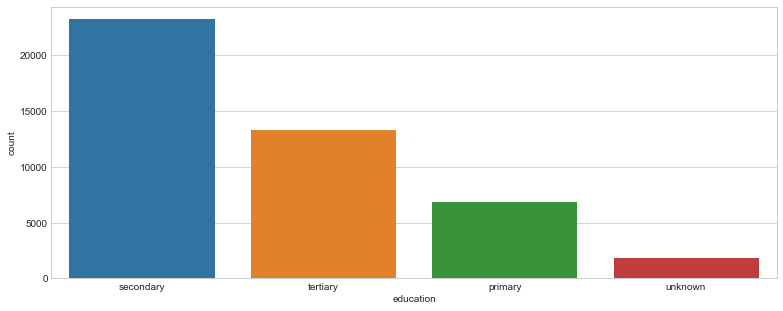

In [29]:
fig, ax = plt.subplots(figsize=(13, 5))
sns.countplot('education',data=bank,order = bank['education'].value_counts().index)

From the above plot,we observe that the customers with education level 'secondary' are more likely to subscribe for the term deposit.

housing
no     20081
yes    25130
dtype: int64
housing
no     44.416182
yes    55.583818
dtype: float64


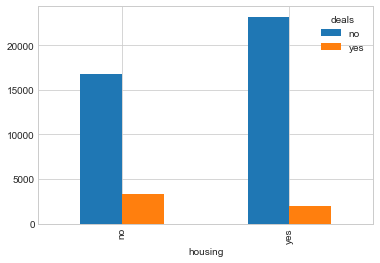

In [30]:
#For Housing
hou = pd.crosstab(bank['housing'], bank['deals'])
hou.plot(kind='bar')
print(bank.groupby(['housing']).size())
print(bank.groupby(['housing']).size()/len(bank)*100)

Here,we can see that the people who do not have housing tend to subscribe more for term deposit. 

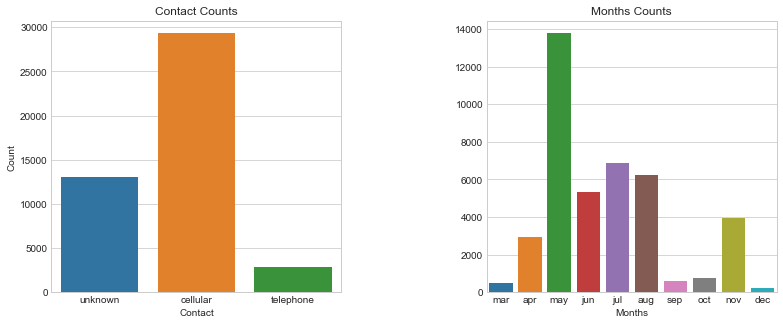

In [31]:
fig, (ax1, ax2) = plt.subplots(nrows = 1, ncols = 2, figsize = (13,5))
sns.countplot(bank['contact'], ax = ax1)
ax1.set_xlabel('Contact', fontsize = 10)
ax1.set_ylabel('Count', fontsize = 10)
ax1.set_title('Contact Counts')
ax1.tick_params(labelsize=10)

sns.countplot(bank['month'], ax = ax2, order = ['mar', 'apr', 'may', 'jun', 'jul', 'aug', 'sep', 'oct', 'nov', 'dec'])
ax2.set_xlabel('Months', fontsize = 10)
ax2.set_ylabel('')
ax2.set_title('Months Counts')
ax2.tick_params(labelsize=10)

plt.subplots_adjust(wspace=0.5)

From the above plots, we can see that the celluar type contact contributed more towards the deals and the month of may had the highest number of subscription for the term deposit.

# Understanding relation between the variable

### Visualize the subscription and contact rate by age

In [32]:
abc = [bank]
for column in abc:
    column.loc[column["age"] < 30,  'age_group'] = 20
    column.loc[(column["age"] >= 30) & (column["age"] <= 39), 'age_group'] = 30
    column.loc[(column["age"] >= 40) & (column["age"] <= 49), 'age_group'] = 40
    column.loc[(column["age"] >= 50) & (column["age"] <= 59), 'age_group'] = 50
    column.loc[column["age"] >= 60, 'age_group'] = 60

In [33]:
count_age_deals_pct = pd.crosstab(bank['deals'],bank['age_group']).apply(lambda x: x/x.sum() * 100)
count_age_deals_pct = count_age_deals_pct.transpose() 

In [34]:
age = pd.DataFrame(bank['age_group'].value_counts())
age['% Contacted'] = age['age_group']*100/age['age_group'].sum()
age['% Subscription'] = count_age_deals_pct['yes']
age.drop('age_group',axis = 1,inplace = True)

age['age'] = [30,40,50,20,60]
age = age.sort_values('age',ascending = True)

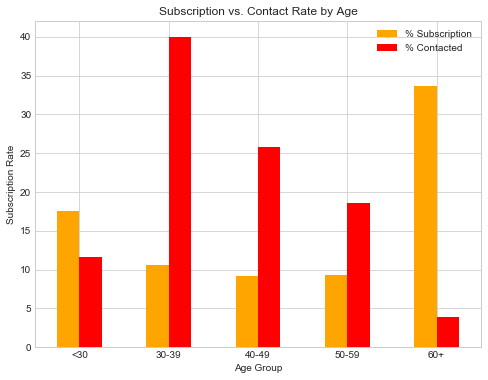

In [35]:
plot_age = age[['% Subscription','% Contacted']].plot(kind = 'bar',
                                              figsize=(8,6), color = ('orange','red'))
plt.xlabel('Age Group')
plt.ylabel('Subscription Rate')
plt.xticks(np.arange(5), ('<30', '30-39', '40-49', '50-59', '60+'),rotation = 'horizontal')
plt.title('Subscription vs. Contact Rate by Age')
plt.show()

From the above plot we can infer that the campaign should target the youngest and the oldest age group people instead of the middle-aged.

Orange vertical bars indicate that clients with a age of 60+ that have the highest subscription rate. About 17% of the subscriptions came from the clients aged between 18 to 29.

But from the red vertical bars we can see that the bank focused its marketing efforts on the middle-aged group, which returned lower subscription rates than the younger and older groups. 

### Visualize the subscription rate by balance range


In [36]:
abc = [bank] 
for column in abc:
    column.loc[column["balance"] <= 0,  'balance_group'] = 'no balance'
    column.loc[(column["balance"] > 0) & (column["balance"] <= 1000), 'balance_group'] = 'low balance'
    column.loc[(column["balance"] > 1000) & (column["balance"] <= 5000), 'balance_group'] = 'average balance'
    column.loc[(column["balance"] > 5000), 'balance_group'] = 'high balance'

In [37]:
count_balance_deals_pct = pd.crosstab(bank['deals'],bank['balance_group']).apply(lambda x: x/x.sum() * 100)
count_balance_deals_pct = count_balance_deals_pct.transpose()

In [38]:
bal = pd.DataFrame(bank['balance_group'].value_counts())
bal['% Contacted'] = bal['balance_group']*100/bal['balance_group'].sum()
bal['% Subscription'] = count_balance_deals_pct['yes']
bal.drop('balance_group',axis = 1,inplace = True)

bal['bal'] = [1,2,0,3]
bal = bal.sort_values('bal',ascending = True)

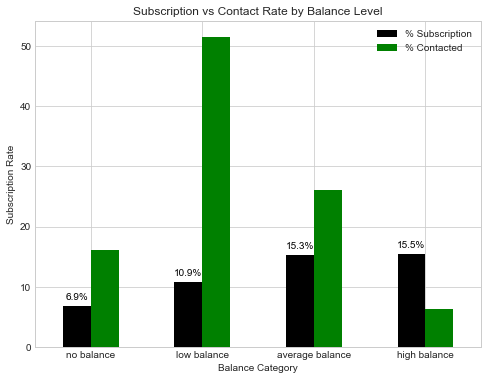

In [39]:
plot_balance = bal[['% Subscription','% Contacted']].plot(kind = 'bar',
                                               color = ('black','green'),
                                               figsize = (8,6))

plt.title('Subscription vs Contact Rate by Balance Level')
plt.ylabel('Subscription Rate')
plt.xlabel('Balance Category')
plt.xticks(rotation = 'horizontal')

# label the bar
for rec, label in zip(plot_balance.patches,
                      bal['% Subscription'].round(1).astype(str)):
    plot_balance.text(rec.get_x() + rec.get_width()/2, 
                      rec.get_height() + 1, 
                      label+'%',  
                      ha = 'center', 
                      color = 'black')

From the above graph we can infere that the campaign should target the clients with average or high balance.

Here we have categorized the clients into four groups based on their balance range:

No Balance: clients with a negative balance.
Low Balance: clients with a balance between 0 and 1000.
Average Balance: clients with a balance between 1000 and 5000.
High Balance: clients with a balance greater than 5000.

This bar chart indicates a positive correlation between clients balance range and subscription rate. Clients with negative balances only returned a subscription rate of 6.9% while clients with average or high balances had significantly higher subscription rates, nearly 15%.

However, in this campaign, more than 50% of clients contacted only have a low balance level. So in future for the capmpaign to be fruitful, the bank should contact to high-balance customers to secure more term deposits.

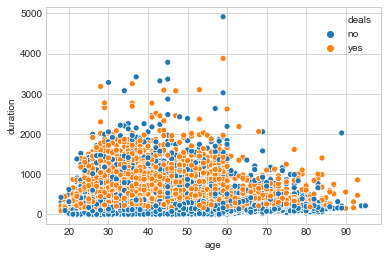

In [40]:
sns.scatterplot(x='age', y='duration',hue='deals', data=bank)

Here from the above scatter plot we can see that the age group of 30-60 had the highest call duration and hence this age range subscribed more for the term deposit.

# Data Preparation for Models Analysis

Converting objects datatype to integer for our model analysis.

In [41]:
bank.head(5)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deals,age_group,balance_group
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no,50.0,average balance
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no,40.0,low balance
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no,30.0,low balance
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no,40.0,average balance
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no,30.0,low balance


In [42]:
#Replace Numeric 0's and 1's in deals column with 'No' and 'Yes'.
bank['deals'] = np.where(bank['deals']=='yes', 1, 0)

In [43]:
#pd.get_dummies Converts the categorical variable into dummy/indicator variables.
new_bank=pd.get_dummies(bank)
new_bank.head()

,age,balance,day,duration,campaign,pdays,previous,deals,age_group,job_admin.,...,month_oct,month_sep,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown,balance_group_average balance,balance_group_high balance,balance_group_low balance,balance_group_no balance
0,58,2143,5,261,1,-1,0,0,50.0,0,...,0,0,0,0,0,1,1,0,0,0
1,44,29,5,151,1,-1,0,0,40.0,0,...,0,0,0,0,0,1,0,0,1,0
2,33,2,5,76,1,-1,0,0,30.0,0,...,0,0,0,0,0,1,0,0,1,0
3,47,1506,5,92,1,-1,0,0,40.0,0,...,0,0,0,0,0,1,1,0,0,0
4,33,1,5,198,1,-1,0,0,30.0,0,...,0,0,0,0,0,1,0,0,1,0


### We will be using Recursive Feature Elimination (RFE) to identify which are the useful predictors required for our analysis

The recursive feature elimination (RFE) will select features by recursively considering smaller and smaller sets of features. 

In [44]:
bank_1=new_bank[new_bank.columns.difference(['deals'])]
bank_output=new_bank['deals']

In [45]:
from sklearn import datasets
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
rfe = RFE(logreg, 18)
rfe = rfe.fit(bank_1, bank_output)
print(rfe.support_)
print(rfe.ranking_)

[False False False False False False False False False False  True False
 False False False False False False False False  True False False False
 False False False False False  True False False False False  True False
 False False False  True  True  True  True  True False  True  True  True
  True  True False  True  True  True  True False]
[30 31 39 23 24  7  4 19  3 13  1 36 11 12 37  6 10 26 14 18  1 32 20 15
  8 29  2 25 27  1 28  9 16 35  1 22  5 34 21  1  1  1  1  1 17  1  1  1
  1  1 38  1  1  1  1 33]


In [46]:
x=bank_1.columns
y=rfe.support_
z=pd.DataFrame(y,index=x)
z=z[z[0]==True]

### Final Columns to be used for model analysis

In [47]:
z.index

Index(['contact_unknown', 'housing_yes', 'job_student', 'loan_yes',
       'month_aug', 'month_dec', 'month_feb', 'month_jan', 'month_jul',
       'month_mar', 'month_may', 'month_nov', 'month_oct', 'month_sep',
       'poutcome_failure', 'poutcome_other', 'poutcome_success',
       'poutcome_unknown'],
      dtype='object')

#### Using RFE, we have identified useful predictors. Now we will compare the model performance based on all predictors against the useful predictors.

# Logistic Regression

### Performing Logistic regression with all predictors

In [48]:
bank_1.head()

,age,age_group,balance,balance_group_average balance,balance_group_high balance,balance_group_low balance,balance_group_no balance,campaign,contact_cellular,contact_telephone,...,month_may,month_nov,month_oct,month_sep,pdays,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown,previous
0,58,50.0,2143,1,0,0,0,1,0,0,...,1,0,0,0,-1,0,0,0,1,0
1,44,40.0,29,0,0,1,0,1,0,0,...,1,0,0,0,-1,0,0,0,1,0
2,33,30.0,2,0,0,1,0,1,0,0,...,1,0,0,0,-1,0,0,0,1,0
3,47,40.0,1506,1,0,0,0,1,0,0,...,1,0,0,0,-1,0,0,0,1,0
4,33,30.0,1,0,0,1,0,1,0,0,...,1,0,0,0,-1,0,0,0,1,0


In [49]:
bank_output.head()

0    0
1    0
2    0
3    0
4    0
Name: deals, dtype: int32

In [50]:
X = bank_1
y = bank_output

In [51]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20) 
LogReg = LogisticRegression()
result=LogReg.fit(X, y)
y_pred = LogReg.predict(X_test)
from sklearn import metrics
lgm_accuracy_all= metrics.accuracy_score(y_pred,y_test)

In [52]:
lgm_accuracy_all

0.9013601680858122

### Performing Logistic Regression on useful variables.

In [53]:
bank_2=bank_1[['contact_unknown', 'housing_yes', 'job_student', 'loan_yes',
       'month_aug', 'month_dec', 'month_feb', 'month_jan', 'month_jul',
       'month_mar', 'month_may', 'month_nov', 'month_oct', 'month_sep',
       'poutcome_failure', 'poutcome_other', 'poutcome_success',
       'poutcome_unknown']]

bank_2.head()

,contact_unknown,housing_yes,job_student,loan_yes,month_aug,month_dec,month_feb,month_jan,month_jul,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown
0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1
1,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1
2,1,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1
3,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1
4,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1


In [54]:
X = bank_2
y =bank_output

In [55]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20)
LogReg = LogisticRegression()
LogReg.fit(X_train, y_train)
y_pred = LogReg.predict(X_test)
from sklearn import metrics
lgm_accuracy_useful=metrics.accuracy_score(y_pred,y_test)

In [56]:
lgm_accuracy_useful

0.8891960632533451

Interpretation of Logistic Regression classifier:

The accuracy with (all predictors) is 90.13%.


The accuracy with (useful predictors) is 88.91%.


# Random Forest Classifier

### Performing Random Forest Classifier with all predictors

In [57]:
X = bank_1
y = bank_output

In [58]:
from sklearn.ensemble import RandomForestClassifier
RF = RandomForestClassifier()
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20)
RF.fit(X_train, y_train)

C:\Users\sshah\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [59]:
y_pred = RF.predict(X_test)
from sklearn import metrics
rf_accuracy_all=metrics.accuracy_score(y_pred,y_test)

In [60]:
rf_accuracy_all

0.8933982085591065

### Performing Random Forest Classifier with useful predictors.

In [61]:
X = bank_2
y = bank_output

In [62]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20)
RF.fit(X_train, y_train)
y_pred = RF.predict(X_test)

In [63]:
from sklearn import metrics
rf_accuracy_useful=metrics.accuracy_score(y_pred,y_test)

In [64]:
rf_accuracy_useful

0.8894172287957536

Interpretation of Random Forest classifier:

The accuracy with (all predictors) is 89.33%.


The accuracy with (useful predictors) is 88.94%.


### Performing Support vector classifier on all predictors

In [65]:
X = bank_1
y = bank_output

In [66]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20)
from sklearn import svm
svm = svm.SVC() 
svm.fit(X_train, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [67]:
y_pred= svm.predict(X_test)
from sklearn import metrics
svc_accuracy_all=metrics.accuracy_score(y_pred,y_test)

In [68]:
svc_accuracy_all

0.8780272033617162

### Performing Support vector classifier on useful predictors

In [69]:
X = bank_2
y = bank_output

In [70]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20)
from sklearn import svm
svm = svm.SVC()
svm.fit(X_train, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [71]:
y_pred= svm.predict(X_test)

In [72]:
from sklearn import metrics
svc_accuracy_useful=metrics.accuracy_score(y_pred,y_test)

In [73]:
svc_accuracy_useful

0.8960521950680084

Interpretation of Support vector classifier:

The accuracy with (all predictors) is 87.80%.


The accuracy with (useful predictors) is 89.60%.



# K Nearest Neighbor Classifier

### Performing K Nearest Neighbour using Cross validation on all predictors

In [74]:
X = bank_1
y = bank_output

In [75]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size =0.20)

In [76]:
# checking classification accuracy of KNN with K=5
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
knn_accuracy_all=metrics.accuracy_score(y_test,y_pred)

In [77]:
knn_accuracy_all

0.8760367134800399

In [78]:
# simulate splitting a dataset of 25 observations into 5 folds
from sklearn.model_selection import KFold
knn = KFold(n_splits=5)
KFold(n_splits=5, random_state=None, shuffle=False)

KFold(n_splits=5, random_state=None, shuffle=False)

In [79]:
from sklearn.model_selection import cross_val_score
# 10-fold cross-validation with K=5 for KNN (the n_neighbors parameter)
knn = KNeighborsClassifier(n_neighbors=5)
scores = cross_val_score(knn, X, y, cv=10, scoring='accuracy')
print (scores)

[0.90070765 0.90092879 0.89559832 0.87126742 0.89250166 0.88321168
 0.84826366 0.8628622  0.87370051 0.8119469 ]


In [80]:
# use average accuracy as an estimate of out-of-sample accuracy
print (scores.mean())

0.8740988787980226


In [81]:
# search for an optimal value of K for KNN
k_range = range(1, 31)
k_scores = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X, y, cv=10, scoring='accuracy')
    k_scores.append(scores.mean())
print (k_scores)

[0.8393286317413355, 0.8759357832569407, 0.8681267975659253, 0.8776829152138619, 0.8740988787980226, 0.8790764073948145, 0.8761118253204427, 0.8792090235699105, 0.8780803821131764, 0.8799390141938034, 0.8789210166761807, 0.88016015527316, 0.8789432041865795, 0.880403483858587, 0.8807128367761887, 0.8810450033968227, 0.8810004425193881, 0.8810892463103283, 0.8813544101222061, 0.8806469641321357, 0.8808236861982175, 0.8804700708382251, 0.8810450034206305, 0.8808461378842425, 0.8809786708857231, 0.8814876720902444, 0.8814653427308364, 0.8819078646188988, 0.8818634847521325, 0.8818636461949572]


Text(0, 0.5, 'Cross-Validated Accuracy')

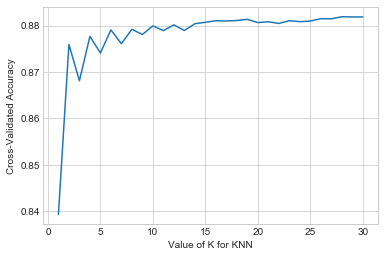

In [82]:
import matplotlib.pyplot as plt

# plot the value of K for KNN (x-axis) versus the cross-validated accuracy (y-axis)
plt.plot(k_range, k_scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-Validated Accuracy')

In [83]:
# 10-fold cross-validation with the best KNN model
knn = KNeighborsClassifier(n_neighbors=20)
print (cross_val_score(knn, X, y, cv=10, scoring='accuracy').mean())

0.8806469641321357


## Performing KNN on useful predictors

In [84]:
X = bank_2
y = bank_output

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20)

In [85]:
# check classification accuracy of KNN with K=5
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
knn_accuracy_useful=(metrics.accuracy_score(y_test, y_pred))

In [86]:
knn_accuracy_useful

0.8834457591507243

In [87]:
# simulate splitting a dataset of 25 observations into 5 folds
from sklearn.model_selection import KFold
knn = KFold(n_splits=5)
KFold(n_splits=5, random_state=None, shuffle=False)

KFold(n_splits=5, random_state=None, shuffle=False)

In [88]:
from sklearn.model_selection import cross_val_score


# 10-fold cross-validation with K=5 for KNN (the n_neighbors parameter)
knn = KNeighborsClassifier(n_neighbors=5)
scores = cross_val_score(knn, X, y, cv=10, scoring='accuracy')
print (scores)

[0.88301636 0.83524989 0.88343287 0.84273391 0.89847379 0.88409644
 0.70957753 0.37204158 0.48263658 0.65265487]


In [89]:
# use average accuracy as an estimate of out-of-sample accuracy
print (scores.mean())

0.7443913821856534


In [90]:
# search for an optimal value of K for KNN
k_range = range(1, 31)
k_scores = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X, y, cv=10, scoring='accuracy')
    k_scores.append(scores.mean())
print (k_scores)

[0.6932071593182421, 0.7061910471490245, 0.6859511338264721, 0.7789206976906811, 0.7443913821856534, 0.7512254050031292, 0.7159452864609476, 0.717471962366701, 0.7151271623870584, 0.7214766171439158, 0.6932073897625508, 0.7032948772594434, 0.6954200972260496, 0.6961058351687478, 0.6961057813393224, 0.6969687600052532, 0.6581491463243578, 0.658459609981666, 0.6583707718555565, 0.6572648658867539, 0.6557828928719343, 0.6541461260042392, 0.6524643919920678, 0.6536589892794563, 0.6512037655741518, 0.6501420633507029, 0.6498101706885344, 0.650407691990306, 0.6514030323195072, 0.6529072515677352]


Text(0, 0.5, 'Cross-Validated Accuracy')

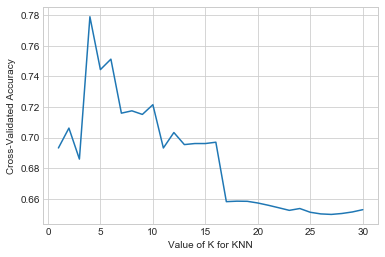

In [91]:
import matplotlib.pyplot as plt

# plot the value of K for KNN (x-axis) versus the cross-validated accuracy (y-axis)
plt.plot(k_range, k_scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-Validated Accuracy')

In [92]:
# 10-fold cross-validation with the best KNN model
knn = KNeighborsClassifier(n_neighbors=20)
print (cross_val_score(knn, X, y, cv=10, scoring='accuracy').mean())

0.6572648658867539



Interpretation of K-Nearest Neighbour classifier:

The accuracy with (all predictors) is 87.60%.


The accuracy with (useful predictors) is 88.34%.

    
    

# Decision Tree Classifier

### Performing Decision Tree classifier on all predictors

In [93]:
X = bank_1
y = bank_output

In [94]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20)

In [95]:
from sklearn import tree
dt=tree.DecisionTreeClassifier(random_state=101)
dt.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=101,
            splitter='best')

In [96]:
y_pred=dt.predict(X_test)
from sklearn import metrics
dt_accuracy_all=metrics.accuracy_score(y_pred,y_test)

In [97]:
dt_accuracy_all

0.8750414685392016

### Performing Decision Tree classifier on useful predictors

In [98]:
X = bank_2
y = bank_output

In [99]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20)

In [100]:
from sklearn import tree
dt=tree.DecisionTreeClassifier(random_state=101)
dt.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=101,
            splitter='best')

In [101]:
y_pred=dt.predict(X_test)

In [102]:
from sklearn import metrics
dt_accuracy_useful=metrics.accuracy_score(y_pred,y_test)

In [103]:
dt_accuracy_useful

0.8938405396439235

Interpretation of Decision Tree classifier:

The accuracy with (all predictors) is 87.50%.


The accuracy with (useful predictors) is 89.38%.

## Accuracy Plot

In [117]:
models = pd.DataFrame({
                'Models': ['Random Forest Classifier', 'Decision Tree Classifier','K-nearest neighbor classifier', 'Support Vector Classifier', 
                          'Logistic Regrresion'],
                'Score':  [rf_accuracy_all, dt_accuracy_all,knn_accuracy_all ,svc_accuracy_all, lgm_accuracy_all]
})

models.sort_values(by='Score', ascending=False)

,Models,Score
4,Logistic Regrresion,0.901360
0,Random Forest Classifier,0.893398
3,Support Vector Classifier,0.878027
2,K-nearest neighbor classifier,0.876037
1,Decision Tree Classifier,0.875041


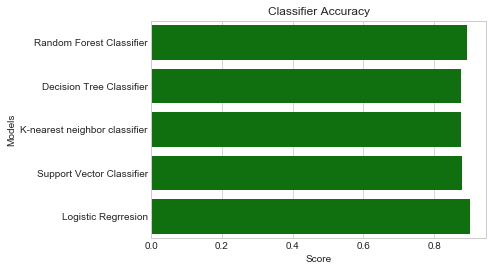

In [118]:
plt.xlabel('Accuracy')
plt.title('Classifier Accuracy')
sns.set_color_codes("muted")
sns.barplot(x='Score', y='Models', data=models, color="green")  
plt.show()

## As Logistic Regression has Highest accuracy we will do futher analysis using logistic regression.

In [119]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
confusion_matrix

array([[7776,  231],
       [ 728,  308]], dtype=int64)

In [120]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

             precision    recall  f1-score   support

          0       0.91      0.97      0.94      8007
          1       0.57      0.30      0.39      1036

avg / total       0.88      0.89      0.88      9043



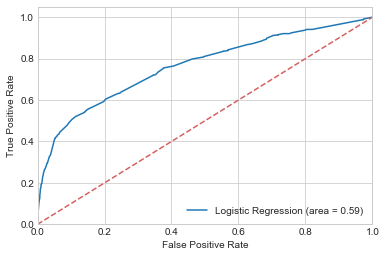

In [121]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, LogReg.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, LogReg.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc="lower right")

# Conclusion

1.  Logistic Regression is the best model in our case as we have output varaible as binary i.e 0 or 1 and obtained highest prediction for potential client who will subscribe to the Term Deposit.


2. Months of Marketing Activity : Highest level of marketing activity is done in month of May.They should try to do marketing campaign in the month of May.


3. Campaign Calls : No more than 3-4 calls should be done on the same client.It is better to focus on new clients.


4. Age Category : They should target the youngest and the oldest instead of the middle-aged i.e from 20 years and close to 60 years and above.


5. Loans : Target the clients with average or high balance, as the highest number of subscribed term deposit are from this range.



By applying above strategies and targeting the right market audience, it is likely that the next marketing campaign of the bank will be more effective than the current one.


# Reference

http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html

http://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html